In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [4]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)


In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8650 - loss: 0.4292 - val_accuracy: 0.9701 - val_loss: 0.0904
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9832 - loss: 0.0561 - val_accuracy: 0.9862 - val_loss: 0.0397
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9880 - loss: 0.0382 - val_accuracy: 0.9883 - val_loss: 0.0346
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9901 - loss: 0.0302 - val_accuracy: 0.9917 - val_loss: 0.0267
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9929 - loss: 0.0218 - val_accuracy: 0.9914 - val_loss: 0.0277
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9887 - loss: 0.0342
Test accuracy: 0.9914000034332275


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


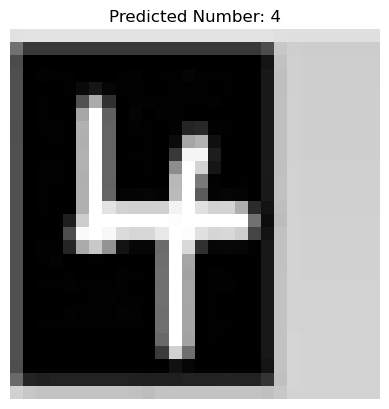

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load and preprocess the image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((28, 28))
    image = np.array(image.convert('L')).astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)
    return image

# Path to the image file
image_path = '/Users/paresh/Downloads/4.png'

# Preprocess the image
image = preprocess_image(image_path)

# Make predictions
predictions = model.predict(image)

# Get the predicted class label
predicted_class = np.argmax(predictions)

# Define class names (optional)
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Plot the image and display the predicted class label
plt.imshow(np.squeeze(image), cmap='gray')
plt.title(f'Predicted Number: {class_names[predicted_class]}')
plt.axis('off')
plt.show()
